In [1]:
from tdc.single_pred import ADME
from DeepPurpose.utils import *
from DeepPurpose import CompoundPred
from tdc import Evaluator
from deepchem import deepchem
import xgboost
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import pandas as pd

# Sandbox

This section was used to experiment with the new packages and data. My initial idea was to train the models on the whole ADME dataset from TDC to in order to better understand the generalisability of the models and benchmark them this way. However, I released this would take too long especially as some of the datasets had bugs in which it would take further time to debug

In [3]:
adme_datasets = retrieve_dataset_names('ADME')
adme_datasets

['lipophilicity_astrazeneca',
 'solubility_aqsoldb',
 'hydrationfreeenergy_freesolv',
 'caco2_wang',
 'pampa_ncats',
 'approved_pampa_ncats',
 'hia_hou',
 'pgp_broccatelli',
 'bioavailability_ma',
 'vdss_lombardo',
 'cyp2c19_veith',
 'cyp2d6_veith',
 'cyp3a4_veith',
 'cyp1a2_veith',
 'cyp2c9_veith',
 'cyp2c9_substrate_carbonmangels',
 'cyp2d6_substrate_carbonmangels',
 'cyp3a4_substrate_carbonmangels',
 'bbb_martins',
 'ppbr_az',
 'half_life_obach',
 'clearance_hepatocyte_az',
 'clearance_microsome_az']

In [29]:
X, y = ADME(name = 'HIA_Hou').get_data(format = 'DeepPurpose')

Found local copy...
Loading...
Done!


In [31]:
drug_encoding = 'MPNN'


In [32]:
train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')

Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.


In [38]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         train_epoch = 10, 
                         LR = 0.001, 
                         batch_size = 128,
                         mpnn_hidden_size = 32,
                         mpnn_depth = 5
                        )

In [39]:
model = CompoundPred.model_initialize(**config)

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.70597. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.44537 , AUPRC: 0.88831 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.41225. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.50980 , AUPRC: 0.86512 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.45698. Total time 0.00083 hours
Validation at Epoch 3 , AUROC: 0.57703 , AUPRC: 0.91057 , F1: 0.93577
Training at Epoch 4 iteration 0 with loss 0.41543. Total time 0.00111 hours
Validation at Epoch 4 , AUROC: 0.62745 , AUPRC: 0.93471 , F1: 0.93577
Training at Epoch 5 iteration 0 with loss 0.39725. Total time 0.00138 hours
Validation at Epoch 5 , AUROC: 0.71428 , AUPRC: 0.95307 , F1: 0.93577
Training at Epoch 6 iteration 0 with loss 0.40073. Total time 0.00194 hours
Validation at Epoch 6 , AUROC: 0.54061 , AUPRC: 0.89913 , F1: 0.93577
Training at Epoch 7 iteration 0 with loss 0.38235. Total time 

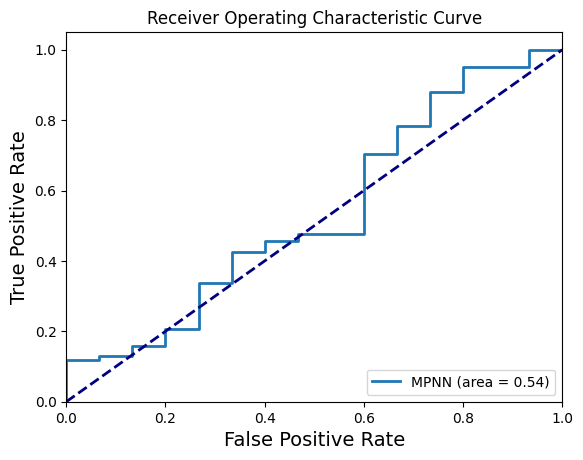

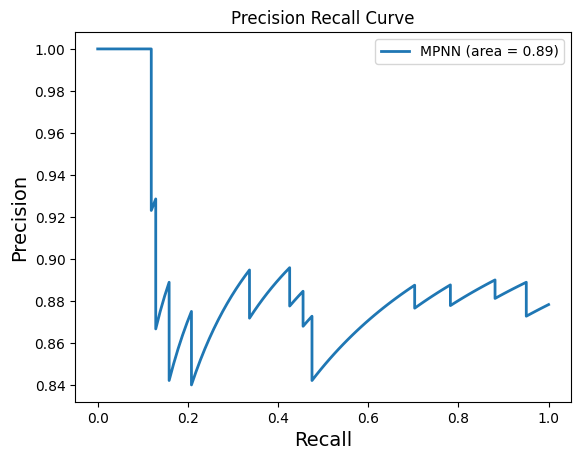

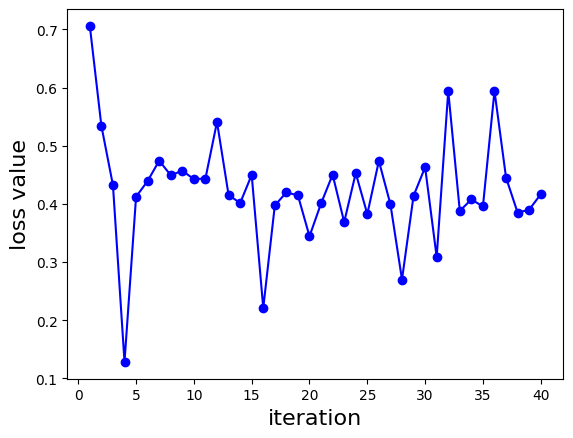

In [40]:
# Training
model.train(train, val, test)

Found local copy...
Loading...
Done!


lipophilicity_astrazeneca
Drug Property Prediction Mode...
in total: 4200 drugs
encoding drug...
unique drugs: 4200
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 6.63499. Total time 0.0 hours
Validation at Epoch 1 , MSE: 1.48724 , Pearson Correlation: 0.00496 with p-value: 9.19E-01 , Concordance Index: 0.51130
Training at Epoch 2 iteration 0 with loss 1.56533. Total time 0.00222 hours
Validation at Epoch 2 , MSE: 1.45666 , Pearson Correlation: 0.12436 with p-value: 1.07E-02 , Concordance Index: 0.53687
Training at Epoch 3 iteration 0 with loss 1.67103. Total time 0.00416 hours
Validation at Epoch 3 , MSE: 1.57760 , Pearson Correlation: -0.0614 with p-value: 2.09E-01 , Concordance Index: 0.53000
Training at Epoch 4 iteration 0 with loss 1.34099. Total time 0.00611 hours
Validation at Epoch 4 , MSE: 1.41589 , Pearson Correlation: 0.15572 with p-value: 1.37E-03 , Concordance Index: 0.56926
Training at Epoch 5 iteration 0 

Found local copy...
Loading...
Done!


Testing MSE: 1.529694189105191 , Pearson Correlation: 0.0624540998634779 with p-value: 7.04E-02 , Concordance Index: 0.5363642319403656
--- Training Finished ---
solubility_aqsoldb
Drug Property Prediction Mode...
in total: 9982 drugs
encoding drug...
unique drugs: 9982


[08:03:41] WARNING: not removing hydrogen atom without neighbors
[08:03:42] WARNING: not removing hydrogen atom without neighbors
[08:03:42] WARNING: not removing hydrogen atom without neighbors
[08:03:43] WARNING: not removing hydrogen atom without neighbors
[08:03:44] WARNING: not removing hydrogen atom without neighbors
[08:03:44] WARNING: not removing hydrogen atom without neighbors
[08:03:45] WARNING: not removing hydrogen atom without neighbors
[08:03:45] WARNING: not removing hydrogen atom without neighbors
[08:03:45] WARNING: not removing hydrogen atom without neighbors
[08:03:45] WARNING: not removing hydrogen atom without neighbors
[08:03:45] WARNING: not removing hydrogen atom without neighbors
[08:03:46] WARNING: not removing hydrogen atom without neighbors


Exception: Please increasing MAX_ATOM in line 26 utils.py, for example, MAX_ATOM=600 and reinstall it via 'python setup.py install'. The current setting is for small molecule. 

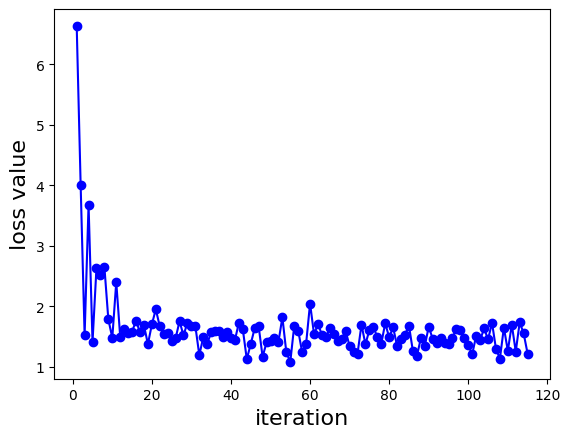

In [42]:
from tdc.utils import retrieve_dataset_names
adme_datasets = retrieve_dataset_names('ADME')

for dataset_name in adme_datasets:
    print(dataset_name)
    X, y = ADME(name = dataset_name).get_data(format = 'DeepPurpose')
    drug_encoding = 'MPNN'
    train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')
    config = utils.generate_config(drug_encoding = drug_encoding, 
                         train_epoch = 5, 
                         LR = 0.001, 
                         batch_size = 128,
                         mpnn_hidden_size = 32,
                         mpnn_depth = 2
                        )
    model = CompoundPred.model_initialize(**config)
    model.train(train, val, test)

In [44]:
adme_datasets

['lipophilicity_astrazeneca',
 'solubility_aqsoldb',
 'hydrationfreeenergy_freesolv',
 'caco2_wang',
 'pampa_ncats',
 'approved_pampa_ncats',
 'hia_hou',
 'pgp_broccatelli',
 'bioavailability_ma',
 'vdss_lombardo',
 'cyp2c19_veith',
 'cyp2d6_veith',
 'cyp3a4_veith',
 'cyp1a2_veith',
 'cyp2c9_veith',
 'cyp2c9_substrate_carbonmangels',
 'cyp2d6_substrate_carbonmangels',
 'cyp3a4_substrate_carbonmangels',
 'bbb_martins',
 'ppbr_az',
 'half_life_obach',
 'clearance_hepatocyte_az',
 'clearance_microsome_az']

In [45]:
adme_datasets.remove('solubility_aqsoldb')

In [46]:
adme_datasets

['lipophilicity_astrazeneca',
 'hydrationfreeenergy_freesolv',
 'caco2_wang',
 'pampa_ncats',
 'approved_pampa_ncats',
 'hia_hou',
 'pgp_broccatelli',
 'bioavailability_ma',
 'vdss_lombardo',
 'cyp2c19_veith',
 'cyp2d6_veith',
 'cyp3a4_veith',
 'cyp1a2_veith',
 'cyp2c9_veith',
 'cyp2c9_substrate_carbonmangels',
 'cyp2d6_substrate_carbonmangels',
 'cyp3a4_substrate_carbonmangels',
 'bbb_martins',
 'ppbr_az',
 'half_life_obach',
 'clearance_hepatocyte_az',
 'clearance_microsome_az']

Found local copy...
Loading...
Done!


lipophilicity_astrazeneca
Drug Property Prediction Mode...
in total: 4200 drugs
encoding drug...
unique drugs: 4200
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 6.52350. Total time 0.0 hours
Validation at Epoch 1 , MSE: 1.51826 , Pearson Correlation: -0.0198 with p-value: 6.85E-01 , Concordance Index: 0.49377
Training at Epoch 2 iteration 0 with loss 1.45319. Total time 0.00194 hours
Validation at Epoch 2 , MSE: 1.53411 , Pearson Correlation: 0.03909 with p-value: 4.24E-01 , Concordance Index: 0.50188
Training at Epoch 3 iteration 0 with loss 1.96032. Total time 0.00388 hours
Validation at Epoch 3 , MSE: 1.51651 , Pearson Correlation: 0.03766 with p-value: 4.41E-01 , Concordance Index: 0.50693
Training at Epoch 4 iteration 0 with loss 1.50198. Total time 0.00611 hours
Validation at Epoch 4 , MSE: 1.44038 , Pearson Correlation: 0.08612 with p-value: 7.79E-02 , Concordance Index: 0.52157
Training at Epoch 5 iteration 0 

Downloading...


Testing MSE: 1.5280416041150944 , Pearson Correlation: 0.08724492477929201 with p-value: 1.14E-02 , Concordance Index: 0.5525432032654177
--- Training Finished ---
hydrationfreeenergy_freesolv


100%|█████████████████████████████████████| 29.0k/29.0k [00:00<00:00, 4.49MiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 642 drugs
encoding drug...
unique drugs: 642
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 20.2408. Total time 0.0 hours
Validation at Epoch 1 , MSE: 15.6497 , Pearson Correlation: 0.03876 with p-value: 7.61E-01 , Concordance Index: 0.47940
Training at Epoch 2 iteration 0 with loss 11.4615. Total time 0.0 hours
Validation at Epoch 2 , MSE: 20.0526 , Pearson Correlation: 0.18467 with p-value: 1.44E-01 , Concordance Index: 0.61091
Training at Epoch 3 iteration 0 with loss 19.1922. Total time 0.00027 hours
Validation at Epoch 3 , MSE: 13.9578 , Pearson Correlation: 0.17449 with p-value: 1.68E-01 , Concordance Index: 0.53002
Training at Epoch 4 iteration 0 with loss 12.6331. Total time 0.00027 hours
Validation at Epoch 4 , MSE: 18.7113 , Pearson Correlation: 0.09712 with p-value: 4.45E-01 , Concordance Index: 0.55334
Training at Epoch 5 iteration 0 with loss 17.8769. Total time 0.

Found local copy...
Loading...
Done!


Validation at Epoch 5 , MSE: 14.9157 , Pearson Correlation: -0.0244 with p-value: 8.48E-01 , Concordance Index: 0.52208
--- Go for Testing ---
Testing MSE: 18.18998203886145 , Pearson Correlation: 0.12771917413908596 with p-value: 1.51E-01 , Concordance Index: 0.5339160408715992
--- Training Finished ---
caco2_wang
Drug Property Prediction Mode...
in total: 910 drugs
encoding drug...
unique drugs: 906
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 27.2481. Total time 0.0 hours
Validation at Epoch 1 , MSE: 2.49494 , Pearson Correlation: -0.2845 with p-value: 6.26E-03 , Concordance Index: 0.41407
Training at Epoch 2 iteration 0 with loss 1.56238. Total time 0.00055 hours
Validation at Epoch 2 , MSE: 1.93331 , Pearson Correlation: -0.0151 with p-value: 8.87E-01 , Concordance Index: 0.50943
Training at Epoch 3 iteration 0 with loss 1.83322. Total time 0.00083 hours
Validation at Epoch 3 , MSE: 1.43298 , Pearson Correlation:

Downloading...


Testing MSE: 1.095048806392381 , Pearson Correlation: -0.0999379588242925 with p-value: 1.79E-01 , Concordance Index: 0.4736714094612672
--- Training Finished ---
pampa_ncats


100%|████████████████████████████████████████| 144k/144k [00:00<00:00, 771kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 2034 drugs
encoding drug...
unique drugs: 2034
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69672. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.53907 , AUPRC: 0.91198 , F1: 0.94818
Training at Epoch 2 iteration 0 with loss 0.33936. Total time 0.00111 hours
Validation at Epoch 2 , AUROC: 0.43306 , AUPRC: 0.90217 , F1: 0.94818
Training at Epoch 3 iteration 0 with loss 0.47663. Total time 0.00222 hours
Validation at Epoch 3 , AUROC: 0.52240 , AUPRC: 0.91485 , F1: 0.94818
Training at Epoch 4 iteration 0 with loss 0.39569. Total time 0.00305 hours
Validation at Epoch 4 , AUROC: 0.57049 , AUPRC: 0.92274 , F1: 0.94818
Training at Epoch 5 iteration 0 with loss 0.37363. Total time 0.00416 hours
Validation at Epoch 5 , AUROC: 0.47650 , AUPRC: 0.90264 , F1: 0.94818
--- Go for Testing ---


Downloading...


Testing AUROC: 0.491225095379398 , AUPRC: 0.8167889746961615 , F1: 0.9059139784946236
--- Training Finished ---
approved_pampa_ncats


100%|██████████████████████████████████████| 10.3k/10.3k [00:00<00:00, 120kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 142 drugs
encoding drug...
unique drugs: 142
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68876. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.47916 , AUPRC: 0.63329 , F1: 0.72727
Training at Epoch 2 iteration 0 with loss 0.66071. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.5 , AUPRC: 0.63272 , F1: 0.72727
Training at Epoch 3 iteration 0 with loss 0.66800. Total time 0.0 hours
Validation at Epoch 3 , AUROC: 0.4375 , AUPRC: 0.65353 , F1: 0.72727
Training at Epoch 4 iteration 0 with loss 0.65926. Total time 0.00027 hours
Validation at Epoch 4 , AUROC: 0.39583 , AUPRC: 0.60002 , F1: 0.72727
Training at Epoch 5 iteration 0 with loss 0.66081. Total time 0.00027 hours
Validation at Epoch 5 , AUROC: 0.5625 , AUPRC: 0.62662 , F1: 0.72727
--- Go for Testing ---


Found local copy...
Loading...
Done!


Testing AUROC: 0.4285714285714286 , AUPRC: 0.7133893134401759 , F1: 0.8571428571428571
--- Training Finished ---
hia_hou
Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.70071. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.34453 , AUPRC: 0.86231 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.47684. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.69187 , AUPRC: 0.94539 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.42084. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.71148 , AUPRC: 0.91853 , F1: 0.93577
Training at Epoch 4 iteration 0 with loss 0.36623. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.65546 , AUPRC: 0.93487 , F1: 0.93577
Training at Epoch 5 iteration 0 with loss 0.42541. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.61344 , AUPRC: 0.92810 , F1: 0

Downloading...


Testing AUROC: 0.4600660066006601 , AUPRC: 0.8728823477525498 , F1: 0.9308755760368664
--- Training Finished ---
pgp_broccatelli


100%|████████████████████████████████████████| 126k/126k [00:00<00:00, 402kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 1218 drugs
encoding drug...
unique drugs: 1212
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69824. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.57611 , AUPRC: 0.66668 , F1: 0.74226
Training at Epoch 2 iteration 0 with loss 0.69350. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.5375 , AUPRC: 0.60991 , F1: 0.74226
Training at Epoch 3 iteration 0 with loss 0.67208. Total time 0.00111 hours
Validation at Epoch 3 , AUROC: 0.49777 , AUPRC: 0.57695 , F1: 0.74226
Training at Epoch 4 iteration 0 with loss 0.69214. Total time 0.00166 hours
Validation at Epoch 4 , AUROC: 0.58305 , AUPRC: 0.67839 , F1: 0.74226
Training at Epoch 5 iteration 0 with loss 0.69095. Total time 0.00222 hours
Validation at Epoch 5 , AUROC: 0.55805 , AUPRC: 0.66131 , F1: 0.74226
--- Go for Testing ---


Downloading...


Testing AUROC: 0.6059139784946235 , AUPRC: 0.6070068150257821 , F1: 0.673913043478261
--- Training Finished ---
bioavailability_ma


100%|██████████████████████████████████████| 43.7k/43.7k [00:00<00:00, 443kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 640 drugs
encoding drug...
unique drugs: 640
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69065. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.80136 , AUPRC: 0.91401 , F1: 0.86725
Training at Epoch 2 iteration 0 with loss 0.57430. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.43673 , AUPRC: 0.78017 , F1: 0.86725
Training at Epoch 3 iteration 0 with loss 0.52273. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.61904 , AUPRC: 0.85009 , F1: 0.86725
Training at Epoch 4 iteration 0 with loss 0.56709. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.55782 , AUPRC: 0.77841 , F1: 0.86725
Training at Epoch 5 iteration 0 with loss 0.55083. Total time 0.00111 hours
Validation at Epoch 5 , AUROC: 0.49387 , AUPRC: 0.79120 , F1: 0.86725
--- Go for Testing ---


Downloading...


Testing AUROC: 0.5475986277873071 , AUPRC: 0.8394045509009356 , F1: 0.905982905982906
--- Training Finished ---
vdss_lombardo


100%|██████████████████████████████████████| 89.9k/89.9k [00:00<00:00, 877kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 1130 drugs
encoding drug...
unique drugs: 1111
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 128.324. Total time 0.0 hours
Validation at Epoch 1 , MSE: 22.9735 , Pearson Correlation: 0.01367 with p-value: 8.86E-01 , Concordance Index: 0.51384
Training at Epoch 2 iteration 0 with loss 3868.85. Total time 0.00055 hours
Validation at Epoch 2 , MSE: 24.0058 , Pearson Correlation: -0.0144 with p-value: 8.79E-01 , Concordance Index: 0.49840
Training at Epoch 3 iteration 0 with loss 107.713. Total time 0.00111 hours
Validation at Epoch 3 , MSE: 22.3282 , Pearson Correlation: 0.05727 with p-value: 5.47E-01 , Concordance Index: 0.51368
Training at Epoch 4 iteration 0 with loss 71.3611. Total time 0.00166 hours
Validation at Epoch 4 , MSE: 24.3463 , Pearson Correlation: -0.0597 with p-value: 5.29E-01 , Concordance Index: 0.50843
Training at Epoch 5 iteration 0 with loss 44.0146. Total t

Downloading...


--- Training Finished ---
cyp2c19_veith


100%|███████████████████████████████████████| 771k/771k [00:00<00:00, 1.51MiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 12665 drugs
encoding drug...
unique drugs: 12665
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69348. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.56606 , AUPRC: 0.54630 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.68100. Total time 0.00638 hours
Validation at Epoch 2 , AUROC: 0.65280 , AUPRC: 0.57561 , F1: 0.65948
Training at Epoch 3 iteration 0 with loss 0.62415. Total time 0.01361 hours
Validation at Epoch 3 , AUROC: 0.75561 , AUPRC: 0.70517 , F1: 0.68292
Training at Epoch 4 iteration 0 with loss 0.59341. Total time 0.02083 hours
Validation at Epoch 4 , AUROC: 0.77578 , AUPRC: 0.72998 , F1: 0.66431
Training at Epoch 5 iteration 0 with loss 0.51038. Total time 0.02805 hours
Validation at Epoch 5 , AUROC: 0.78698 , AUPRC: 0.74763 , F1: 0.64930
--- Go for Testing ---


Downloading...


Testing AUROC: 0.8024263737371828 , AUPRC: 0.746793269507433 , F1: 0.648675171736997
--- Training Finished ---
cyp2d6_veith


100%|███████████████████████████████████████| 800k/800k [00:00<00:00, 1.82MiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 13130 drugs
encoding drug...
unique drugs: 13130
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68009. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.55564 , AUPRC: 0.20483 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.45558. Total time 0.00611 hours
Validation at Epoch 2 , AUROC: 0.65833 , AUPRC: 0.28407 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.45428. Total time 0.01138 hours
Validation at Epoch 3 , AUROC: 0.68580 , AUPRC: 0.35394 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.39549. Total time 0.01694 hours
Validation at Epoch 4 , AUROC: 0.71174 , AUPRC: 0.37102 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.45910. Total time 0.02333 hours
Validation at Epoch 5 , AUROC: 0.72207 , AUPRC: 0.40288 , F1: 0.06374
--- Go for Testing ---


Downloading...


Testing AUROC: 0.7429344050681269 , AUPRC: 0.4778067196564938 , F1: 0.08710217755443886
--- Training Finished ---
cyp3a4_veith


100%|███████████████████████████████████████| 746k/746k [00:00<00:00, 1.99MiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 12328 drugs
encoding drug...
unique drugs: 12328
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69426. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.63217 , AUPRC: 0.52480 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.67931. Total time 0.00527 hours
Validation at Epoch 2 , AUROC: 0.68085 , AUPRC: 0.55423 , F1: 0.53575
Training at Epoch 3 iteration 0 with loss 0.59645. Total time 0.01 hours
Validation at Epoch 3 , AUROC: 0.69190 , AUPRC: 0.56319 , F1: 0.48943
Training at Epoch 4 iteration 0 with loss 0.60922. Total time 0.01527 hours
Validation at Epoch 4 , AUROC: 0.71171 , AUPRC: 0.58174 , F1: 0.60294
Training at Epoch 5 iteration 0 with loss 0.62125. Total time 0.02083 hours
Validation at Epoch 5 , AUROC: 0.72322 , AUPRC: 0.59221 , F1: 0.62295
--- Go for Testing ---


Downloading...


Testing AUROC: 0.7271471322365065 , AUPRC: 0.6073797734218006 , F1: 0.615738610216291
--- Training Finished ---
cyp1a2_veith


100%|███████████████████████████████████████| 760k/760k [00:00<00:00, 1.66MiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 12579 drugs
encoding drug...
unique drugs: 12579
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69267. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.77692 , AUPRC: 0.71176 , F1: 0.70579
Training at Epoch 2 iteration 0 with loss 0.61681. Total time 0.00583 hours
Validation at Epoch 2 , AUROC: 0.83919 , AUPRC: 0.80743 , F1: 0.73848
Training at Epoch 3 iteration 0 with loss 0.48982. Total time 0.01138 hours
Validation at Epoch 3 , AUROC: 0.85106 , AUPRC: 0.81794 , F1: 0.75316
Training at Epoch 4 iteration 0 with loss 0.53924. Total time 0.01694 hours
Validation at Epoch 4 , AUROC: 0.85948 , AUPRC: 0.83193 , F1: 0.74414
Training at Epoch 5 iteration 0 with loss 0.50445. Total time 0.0225 hours
Validation at Epoch 5 , AUROC: 0.86564 , AUPRC: 0.83774 , F1: 0.74259
--- Go for Testing ---


Downloading...


Testing AUROC: 0.8396942446499795 , AUPRC: 0.8088148887550821 , F1: 0.7220475976650202
--- Training Finished ---
cyp2c9_veith


100%|███████████████████████████████████████| 740k/740k [00:00<00:00, 1.70MiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 12092 drugs
encoding drug...
unique drugs: 12092
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68727. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.57268 , AUPRC: 0.38882 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.62353. Total time 0.005 hours
Validation at Epoch 2 , AUROC: 0.67467 , AUPRC: 0.43719 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.63946. Total time 0.01027 hours
Validation at Epoch 3 , AUROC: 0.70402 , AUPRC: 0.47377 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.59895. Total time 0.01583 hours
Validation at Epoch 4 , AUROC: 0.73769 , AUPRC: 0.50744 , F1: 0.45664
Training at Epoch 5 iteration 0 with loss 0.54939. Total time 0.02111 hours
Validation at Epoch 5 , AUROC: 0.74443 , AUPRC: 0.52354 , F1: 0.45467
--- Go for Testing ---


Downloading...


Testing AUROC: 0.7527662828355522 , AUPRC: 0.5473650810851921 , F1: 0.4910979228486647
--- Training Finished ---
cyp2c9_substrate_carbonmangels


100%|██████████████████████████████████████| 45.6k/45.6k [00:00<00:00, 256kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 669 drugs
encoding drug...
unique drugs: 666
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69440. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.47820 , AUPRC: 0.25462 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.54256. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.54743 , AUPRC: 0.26977 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.53440. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.50128 , AUPRC: 0.29705 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.54898. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.55 , AUPRC: 0.26599 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.60240. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.60769 , AUPRC: 0.30040 , F1: 0.0
--- Go for Testing ---


Downloading...


Testing AUROC: 0.4382139148494289 , AUPRC: 0.1993917539513684 , F1: 0.0
--- Training Finished ---
cyp2d6_substrate_carbonmangels


100%|██████████████████████████████████████| 45.4k/45.4k [00:00<00:00, 514kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 667 drugs
encoding drug...
unique drugs: 664
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68756. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.51759 , AUPRC: 0.31932 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.59237. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.55175 , AUPRC: 0.38186 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.62609. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.61801 , AUPRC: 0.44108 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.51366. Total time 0.00083 hours
Validation at Epoch 4 , AUROC: 0.50931 , AUPRC: 0.32069 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.55198. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.41304 , AUPRC: 0.27554 , F1: 0.0
--- Go for Testing ---


Downloading...


Testing AUROC: 0.5193627450980391 , AUPRC: 0.36483369767190876 , F1: 0.0
--- Training Finished ---
cyp3a4_substrate_carbonmangels


100%|██████████████████████████████████████| 46.0k/46.0k [00:00<00:00, 403kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 670 drugs
encoding drug...
unique drugs: 667
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69171. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.54838 , AUPRC: 0.49728 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.69965. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.47939 , AUPRC: 0.49139 , F1: 0.63265
Training at Epoch 3 iteration 0 with loss 0.69180. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.53315 , AUPRC: 0.46674 , F1: 0.63265
Training at Epoch 4 iteration 0 with loss 0.69371. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.40412 , AUPRC: 0.48225 , F1: 0.63265
Training at Epoch 5 iteration 0 with loss 0.68894. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.61917 , AUPRC: 0.62129 , F1: 0.63265
--- Go for Testing ---


Downloading...


Testing AUROC: 0.47593582887700536 , AUPRC: 0.4662113640659288 , F1: 0.66
--- Training Finished ---
bbb_martins


100%|████████████████████████████████████████| 138k/138k [00:00<00:00, 269kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 2030 drugs
encoding drug...
unique drugs: 1975


[08:27:05] WARNING: not removing hydrogen atom without neighbors
[08:27:05] WARNING: not removing hydrogen atom without neighbors
[08:27:06] WARNING: not removing hydrogen atom without neighbors
[08:27:06] WARNING: not removing hydrogen atom without neighbors
[08:27:06] WARNING: not removing hydrogen atom without neighbors
[08:27:06] WARNING: not removing hydrogen atom without neighbors
[08:27:06] WARNING: not removing hydrogen atom without neighbors
[08:27:07] WARNING: not removing hydrogen atom without neighbors
[08:27:07] WARNING: not removing hydrogen atom without neighbors
[08:27:08] WARNING: not removing hydrogen atom without neighbors
[08:27:08] WARNING: not removing hydrogen atom without neighbors
[08:27:08] WARNING: not removing hydrogen atom without neighbors
[08:27:08] WARNING: not removing hydrogen atom without neighbors
[08:27:09] WARNING: not removing hydrogen atom without neighbors
[08:27:10] WARNING: not removing hydrogen atom without neighbors
[08:27:10] WARNING: not r

Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69011. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.53965 , AUPRC: 0.79256 , F1: 0.86592
Training at Epoch 2 iteration 0 with loss 0.51908. Total time 0.00083 hours
Validation at Epoch 2 , AUROC: 0.60604 , AUPRC: 0.83762 , F1: 0.86592
Training at Epoch 3 iteration 0 with loss 0.58252. Total time 0.00166 hours
Validation at Epoch 3 , AUROC: 0.54986 , AUPRC: 0.80436 , F1: 0.86592
Training at Epoch 4 iteration 0 with loss 0.56407. Total time 0.0025 hours
Validation at Epoch 4 , AUROC: 0.53938 , AUPRC: 0.80440 , F1: 0.86592
Training at Epoch 5 iteration 0 with loss 0.51790. Total time 0.00333 hours
Validation at Epoch 5 , AUROC: 0.58844 , AUPRC: 0.82804 , F1: 0.86592
--- Go for Testing ---


Downloading...


Testing AUROC: 0.5214460784313726 , AUPRC: 0.7820251428942742 , F1: 0.856338028169014
--- Training Finished ---
ppbr_az


100%|████████████████████████████████████████| 265k/265k [00:00<00:00, 993kiB/s]
Loading...
Done!


AttributeError: 'numpy.ndarray' object has no attribute 'values'

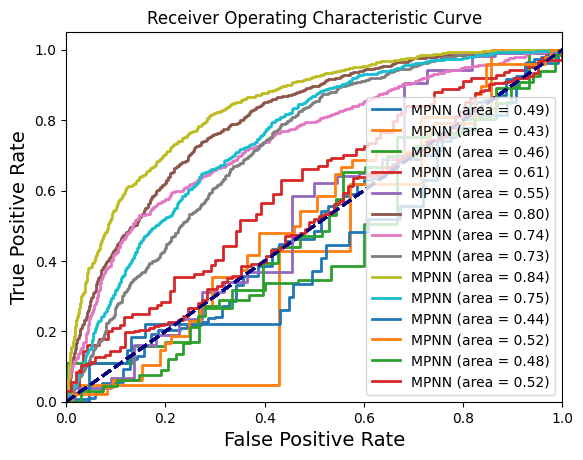

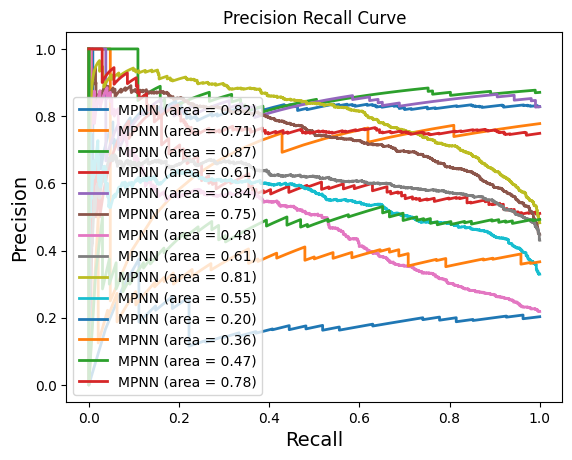

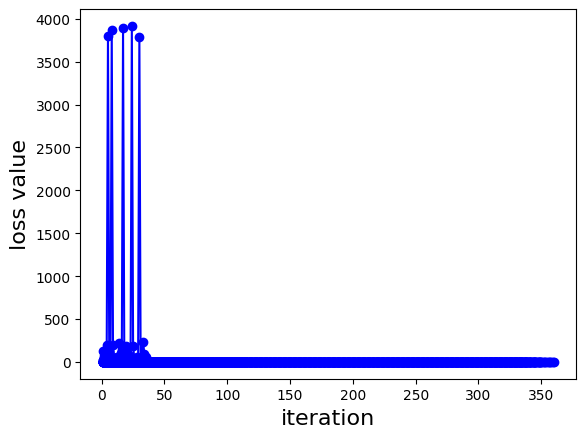

In [47]:
from tdc.utils import retrieve_dataset_names
adme_datasets = retrieve_dataset_names('ADME')

for dataset_name in adme_datasets:
    print(dataset_name)
    X, y = ADME(name = dataset_name).get_data(format = 'DeepPurpose')
    drug_encoding = 'MPNN'
    train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')
    config = utils.generate_config(drug_encoding = drug_encoding, 
                         train_epoch = 5, 
                         LR = 0.001, 
                         batch_size = 128,
                         mpnn_hidden_size = 32,
                         mpnn_depth = 2
                        )
    model = CompoundPred.model_initialize(**config)
    model.train(train, val, test)

In [67]:
# Determining whether to remove the ppbr_az dataset
X, y = ADME(name = 'ppbr_az').get_data(format = 'Dict')
drug_encoding = 'MPNN'
train, val, test = utils.data_process(X_drug = X, 
                                  y = y, 
                                  drug_encoding = drug_encoding,
                                  random_seed = 'TDC')
config = utils.generate_config(drug_encoding = drug_encoding, 
                    train_epoch = 5, 
                     LR = 0.001, 
                     batch_size = 128,
                     mpnn_hidden_size = 32,
                     mpnn_depth = 2)
                    
model = CompoundPred.model_initialize(**config)
model.train(train, val, test)

Found local copy...
Loading...
Done!


AttributeError: Please use the correct format input

Found local copy...
Loading...
Done!


lipophilicity_astrazeneca
Drug Property Prediction Mode...
in total: 4200 drugs
encoding drug...
unique drugs: 4200
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 6.56085. Total time 0.0 hours
Validation at Epoch 1 , MSE: 1.46325 , Pearson Correlation: 0.03466 with p-value: 4.79E-01 , Concordance Index: 0.50654
Training at Epoch 2 iteration 0 with loss 1.53861. Total time 0.00305 hours
Validation at Epoch 2 , MSE: 1.55474 , Pearson Correlation: -0.1083 with p-value: 2.63E-02 , Concordance Index: 0.47460
Training at Epoch 3 iteration 0 with loss 1.43935. Total time 0.00583 hours
Validation at Epoch 3 , MSE: 1.49004 , Pearson Correlation: -0.0006 with p-value: 9.89E-01 , Concordance Index: 0.50558
Training at Epoch 4 iteration 0 with loss 1.66086. Total time 0.00888 hours
Validation at Epoch 4 , MSE: 1.55003 , Pearson Correlation: 0.01172 with p-value: 8.11E-01 , Concordance Index: 0.54459
Training at Epoch 5 iteration 0 

Found local copy...
Loading...
Done!


hydrationfreeenergy_freesolv
Drug Property Prediction Mode...
in total: 642 drugs
encoding drug...
unique drugs: 642
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 29.3327. Total time 0.0 hours
Validation at Epoch 1 , MSE: 19.7332 , Pearson Correlation: 0.08393 with p-value: 5.10E-01 , Concordance Index: 0.51513
Training at Epoch 2 iteration 0 with loss 17.0400. Total time 0.00027 hours
Validation at Epoch 2 , MSE: 18.0427 , Pearson Correlation: -0.1649 with p-value: 1.93E-01 , Concordance Index: 0.41538
Training at Epoch 3 iteration 0 with loss 12.9945. Total time 0.00027 hours
Validation at Epoch 3 , MSE: 27.9837 , Pearson Correlation: 0.01053 with p-value: 9.34E-01 , Concordance Index: 0.49429
Training at Epoch 4 iteration 0 with loss 16.8054. Total time 0.00055 hours
Validation at Epoch 4 , MSE: 32.7158 , Pearson Correlation: -0.0275 with p-value: 8.29E-01 , Concordance Index: 0.49230
Training at Epoch 5 iteration 0

Found local copy...
Loading...
Done!


caco2_wang
Drug Property Prediction Mode...
in total: 910 drugs
encoding drug...
unique drugs: 906
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 28.0010. Total time 0.0 hours
Validation at Epoch 1 , MSE: 14.8008 , Pearson Correlation: -0.0245 with p-value: 8.17E-01 , Concordance Index: 0.49276
Training at Epoch 2 iteration 0 with loss 16.2506. Total time 0.00083 hours
Validation at Epoch 2 , MSE: 8.66099 , Pearson Correlation: -0.1571 with p-value: 1.37E-01 , Concordance Index: 0.47928
Training at Epoch 3 iteration 0 with loss 8.13032. Total time 0.00138 hours
Validation at Epoch 3 , MSE: 3.90438 , Pearson Correlation: 0.07413 with p-value: 4.85E-01 , Concordance Index: 0.53199
Training at Epoch 4 iteration 0 with loss 3.59008. Total time 0.00222 hours
Validation at Epoch 4 , MSE: 3.69459 , Pearson Correlation: 0.06276 with p-value: 5.55E-01 , Concordance Index: 0.53027
Training at Epoch 5 iteration 0 with loss 4.53629

Found local copy...
Loading...


--- Training Finished ---
predicting...
pampa_ncats


Done!


Drug Property Prediction Mode...
in total: 2034 drugs
encoding drug...
unique drugs: 2034
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68921. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.45355 , AUPRC: 0.88586 , F1: 0.94818
Training at Epoch 2 iteration 0 with loss 0.43263. Total time 0.00166 hours
Validation at Epoch 2 , AUROC: 0.52896 , AUPRC: 0.91127 , F1: 0.94818
Training at Epoch 3 iteration 0 with loss 0.42310. Total time 0.00305 hours
Validation at Epoch 3 , AUROC: 0.69754 , AUPRC: 0.95688 , F1: 0.94818
Training at Epoch 4 iteration 0 with loss 0.34560. Total time 0.00444 hours
Validation at Epoch 4 , AUROC: 0.58114 , AUPRC: 0.92673 , F1: 0.94818
Training at Epoch 5 iteration 0 with loss 0.43023. Total time 0.00583 hours
Validation at Epoch 5 , AUROC: 0.56612 , AUPRC: 0.91507 , F1: 0.94818
Training at Epoch 6 iteration 0 with loss 0.43125. Total time 0.0075 hours
Validation at Epoch 6 , AUROC: 0.4759

Found local copy...
Loading...
Done!


approved_pampa_ncats
Drug Property Prediction Mode...
in total: 142 drugs
encoding drug...
unique drugs: 142
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69097. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.54166 , AUPRC: 0.68156 , F1: 0.72727
Training at Epoch 2 iteration 0 with loss 0.66124. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.5 , AUPRC: 0.68389 , F1: 0.72727
Training at Epoch 3 iteration 0 with loss 0.68923. Total time 0.0 hours
Validation at Epoch 3 , AUROC: 0.45833 , AUPRC: 0.62780 , F1: 0.72727
Training at Epoch 4 iteration 0 with loss 0.66399. Total time 0.00027 hours
Validation at Epoch 4 , AUROC: 0.625 , AUPRC: 0.65995 , F1: 0.72727
Training at Epoch 5 iteration 0 with loss 0.66310. Total time 0.00027 hours
Validation at Epoch 5 , AUROC: 0.77083 , AUPRC: 0.74360 , F1: 0.72727
Training at Epoch 6 iteration 0 with loss 0.66561. Total time 0.00027 hours
Validation at Epoch 6 , AUROC: 

Found local copy...
Loading...
Done!


Testing AUROC: 0.4489795918367347 , AUPRC: 0.7800651607894942 , F1: 0.8571428571428571
--- Training Finished ---
predicting...
hia_hou
Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.67904. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.49859 , AUPRC: 0.89368 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.44570. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.41736 , AUPRC: 0.88072 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.39882. Total time 0.00083 hours
Validation at Epoch 3 , AUROC: 0.50140 , AUPRC: 0.88383 , F1: 0.93577
Training at Epoch 4 iteration 0 with loss 0.41200. Total time 0.00111 hours
Validation at Epoch 4 , AUROC: 0.34173 , AUPRC: 0.85514 , F1: 0.93577
Training at Epoch 5 iteration 0 with loss 0.34240. Total time 0.00138 hours
Validation at Epoch 5 , AUROC: 0.55462 , AUPRC: 0

Found local copy...
Loading...
Done!


Testing AUROC: 0.5399339933993399 , AUPRC: 0.9000736156317035 , F1: 0.9308755760368664
--- Training Finished ---
predicting...
pgp_broccatelli
Drug Property Prediction Mode...
in total: 1218 drugs
encoding drug...
unique drugs: 1212
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69308. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.47666 , AUPRC: 0.60841 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.70239. Total time 0.00083 hours
Validation at Epoch 2 , AUROC: 0.54750 , AUPRC: 0.62575 , F1: 0.18823
Training at Epoch 3 iteration 0 with loss 0.69300. Total time 0.00166 hours
Validation at Epoch 3 , AUROC: 0.54138 , AUPRC: 0.66943 , F1: 0.74226
Training at Epoch 4 iteration 0 with loss 0.68958. Total time 0.0025 hours
Validation at Epoch 4 , AUROC: 0.57805 , AUPRC: 0.64229 , F1: 0.74226
Training at Epoch 5 iteration 0 with loss 0.68914. Total time 0.00333 hours
Validation at Epoch 5 , AUROC: 0.54194 , AUP

Found local copy...
Loading...
Done!


bioavailability_ma
Drug Property Prediction Mode...
in total: 640 drugs
encoding drug...
unique drugs: 640
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69872. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.64489 , AUPRC: 0.87987 , F1: 0.86725
Training at Epoch 2 iteration 0 with loss 0.73294. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.61496 , AUPRC: 0.82199 , F1: 0.86725
Training at Epoch 3 iteration 0 with loss 0.59629. Total time 0.00083 hours
Validation at Epoch 3 , AUROC: 0.72244 , AUPRC: 0.89722 , F1: 0.86725
Training at Epoch 4 iteration 0 with loss 0.61485. Total time 0.00111 hours
Validation at Epoch 4 , AUROC: 0.47074 , AUPRC: 0.76356 , F1: 0.86725
Training at Epoch 5 iteration 0 with loss 0.59247. Total time 0.00138 hours
Validation at Epoch 5 , AUROC: 0.52380 , AUPRC: 0.75563 , F1: 0.86725
Training at Epoch 6 iteration 0 with loss 0.53250. Total time 0.00194 hours
Validation at Epoch

Found local copy...
Loading...


Testing AUROC: 0.5964837049742711 , AUPRC: 0.8553259013789829 , F1: 0.905982905982906
--- Training Finished ---
predicting...
vdss_lombardo


Done!


Drug Property Prediction Mode...
in total: 1130 drugs
encoding drug...
unique drugs: 1111
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 48.0761. Total time 0.0 hours
Validation at Epoch 1 , MSE: 22.3604 , Pearson Correlation: -0.0528 with p-value: 5.78E-01 , Concordance Index: 0.48743
Training at Epoch 2 iteration 0 with loss 1957.84. Total time 0.00111 hours
Validation at Epoch 2 , MSE: 20.1696 , Pearson Correlation: 0.04734 with p-value: 6.19E-01 , Concordance Index: 0.49809
Training at Epoch 3 iteration 0 with loss 2008.92. Total time 0.00194 hours
Validation at Epoch 3 , MSE: 25.6712 , Pearson Correlation: 0.01468 with p-value: 8.77E-01 , Concordance Index: 0.49300
Training at Epoch 4 iteration 0 with loss 2010.36. Total time 0.00277 hours
Validation at Epoch 4 , MSE: 20.4859 , Pearson Correlation: 0.00496 with p-value: 9.58E-01 , Concordance Index: 0.51224
Training at Epoch 5 iteration 0 with loss 1952.66. Total t

Found local copy...
Loading...
Done!


cyp2c19_veith
Drug Property Prediction Mode...
in total: 12665 drugs
encoding drug...
unique drugs: 12665
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69299. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.53560 , AUPRC: 0.50346 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.69121. Total time 0.00861 hours
Validation at Epoch 2 , AUROC: 0.60254 , AUPRC: 0.56011 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.68458. Total time 0.01694 hours
Validation at Epoch 3 , AUROC: 0.65623 , AUPRC: 0.59734 , F1: 0.45299
Training at Epoch 4 iteration 0 with loss 0.62716. Total time 0.02527 hours
Validation at Epoch 4 , AUROC: 0.68392 , AUPRC: 0.62373 , F1: 0.58994
Training at Epoch 5 iteration 0 with loss 0.59850. Total time 0.03583 hours
Validation at Epoch 5 , AUROC: 0.72344 , AUPRC: 0.66556 , F1: 0.67459
Training at Epoch 6 iteration 0 with loss 0.59755. Total time 0.045 hours
Validation at Epoch 6 , AUROC:

Found local copy...
Loading...
Done!


cyp2d6_veith
Drug Property Prediction Mode...
in total: 13130 drugs
encoding drug...
unique drugs: 13130
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68962. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.55367 , AUPRC: 0.21020 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.41561. Total time 0.00861 hours
Validation at Epoch 2 , AUROC: 0.56834 , AUPRC: 0.22662 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.45125. Total time 0.01722 hours
Validation at Epoch 3 , AUROC: 0.60406 , AUPRC: 0.23674 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.46395. Total time 0.02583 hours
Validation at Epoch 4 , AUROC: 0.67619 , AUPRC: 0.33810 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.44957. Total time 0.03444 hours
Validation at Epoch 5 , AUROC: 0.69134 , AUPRC: 0.35684 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.40298. Total time 0.04305 hours
Validation at Epoch 6 , AUROC: 0.69868 , 

Found local copy...
Loading...
Done!


cyp3a4_veith
Drug Property Prediction Mode...
in total: 12328 drugs
encoding drug...
unique drugs: 12328
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69567. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.55324 , AUPRC: 0.45943 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.66234. Total time 0.00833 hours
Validation at Epoch 2 , AUROC: 0.60984 , AUPRC: 0.50989 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.66788. Total time 0.01666 hours
Validation at Epoch 3 , AUROC: 0.67346 , AUPRC: 0.53999 , F1: 0.61120
Training at Epoch 4 iteration 0 with loss 0.62182. Total time 0.02444 hours
Validation at Epoch 4 , AUROC: 0.68592 , AUPRC: 0.55862 , F1: 0.52497
Training at Epoch 5 iteration 0 with loss 0.64430. Total time 0.03222 hours
Validation at Epoch 5 , AUROC: 0.69720 , AUPRC: 0.56734 , F1: 0.48368
Training at Epoch 6 iteration 0 with loss 0.58525. Total time 0.03972 hours
Validation at Epoch 6 , AUROC

Found local copy...
Loading...
Done!


cyp1a2_veith
Drug Property Prediction Mode...
in total: 12579 drugs
encoding drug...
unique drugs: 12579
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69754. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.61704 , AUPRC: 0.58684 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.68968. Total time 0.00833 hours
Validation at Epoch 2 , AUROC: 0.81098 , AUPRC: 0.77595 , F1: 0.65934
Training at Epoch 3 iteration 0 with loss 0.58379. Total time 0.01611 hours
Validation at Epoch 3 , AUROC: 0.82180 , AUPRC: 0.78867 , F1: 0.72979
Training at Epoch 4 iteration 0 with loss 0.48189. Total time 0.02472 hours
Validation at Epoch 4 , AUROC: 0.83767 , AUPRC: 0.80585 , F1: 0.74012
Training at Epoch 5 iteration 0 with loss 0.50901. Total time 0.03416 hours
Validation at Epoch 5 , AUROC: 0.84913 , AUPRC: 0.81543 , F1: 0.72727
Training at Epoch 6 iteration 0 with loss 0.52553. Total time 0.04333 hours
Validation at Epoch 6 , A

Found local copy...
Loading...
Done!


cyp2c9_veith
Drug Property Prediction Mode...
in total: 12092 drugs
encoding drug...
unique drugs: 12092
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69253. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.58296 , AUPRC: 0.38557 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.61029. Total time 0.00777 hours
Validation at Epoch 2 , AUROC: 0.56332 , AUPRC: 0.36509 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.63474. Total time 0.01555 hours
Validation at Epoch 3 , AUROC: 0.65765 , AUPRC: 0.42955 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.61305. Total time 0.02333 hours
Validation at Epoch 4 , AUROC: 0.69107 , AUPRC: 0.44759 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.56222. Total time 0.03111 hours
Validation at Epoch 5 , AUROC: 0.69828 , AUPRC: 0.45813 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.60463. Total time 0.03972 hours
Validation at Epoch 6 , AUROC: 0.72216 , 

Found local copy...
Loading...
Done!


cyp2c9_substrate_carbonmangels
Drug Property Prediction Mode...
in total: 669 drugs
encoding drug...
unique drugs: 666
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69564. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.37051 , AUPRC: 0.22029 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.60761. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.6 , AUPRC: 0.36074 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.52943. Total time 0.00083 hours
Validation at Epoch 3 , AUROC: 0.54102 , AUPRC: 0.28848 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.49013. Total time 0.00111 hours
Validation at Epoch 4 , AUROC: 0.51410 , AUPRC: 0.22146 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.46898. Total time 0.00166 hours
Validation at Epoch 5 , AUROC: 0.41153 , AUPRC: 0.21369 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.57180. Total time 0.00194 hours
Validation at Epoch 6 , AUROC: 

Found local copy...
Loading...
Done!


cyp2d6_substrate_carbonmangels
Drug Property Prediction Mode...
in total: 667 drugs
encoding drug...
unique drugs: 664
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69823. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.37370 , AUPRC: 0.27987 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.63333. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.51656 , AUPRC: 0.33196 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.61193. Total time 0.00083 hours
Validation at Epoch 3 , AUROC: 0.43633 , AUPRC: 0.31923 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.63339. Total time 0.00111 hours
Validation at Epoch 4 , AUROC: 0.57556 , AUPRC: 0.36385 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.61716. Total time 0.00166 hours
Validation at Epoch 5 , AUROC: 0.53209 , AUPRC: 0.32687 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.59430. Total time 0.00194 hours
Validation at Epoch 6 , AUR

Found local copy...
Loading...
Done!


cyp3a4_substrate_carbonmangels
Drug Property Prediction Mode...
in total: 670 drugs
encoding drug...
unique drugs: 667
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69152. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.54749 , AUPRC: 0.53261 , F1: 0.63265
Training at Epoch 2 iteration 0 with loss 0.68569. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.46326 , AUPRC: 0.45582 , F1: 0.63265
Training at Epoch 3 iteration 0 with loss 0.68903. Total time 0.00083 hours
Validation at Epoch 3 , AUROC: 0.52867 , AUPRC: 0.46148 , F1: 0.63265
Training at Epoch 4 iteration 0 with loss 0.69071. Total time 0.00111 hours
Validation at Epoch 4 , AUROC: 0.47043 , AUPRC: 0.43832 , F1: 0.63265
Training at Epoch 5 iteration 0 with loss 0.68097. Total time 0.00166 hours
Validation at Epoch 5 , AUROC: 0.46146 , AUPRC: 0.47633 , F1: 0.63265
Training at Epoch 6 iteration 0 with loss 0.68531. Total time 0.00194 hours
Validat

Found local copy...
Loading...
Done!


bbb_martins
Drug Property Prediction Mode...
in total: 2030 drugs
encoding drug...
unique drugs: 1975


[11:53:48] WARNING: not removing hydrogen atom without neighbors
[11:53:49] WARNING: not removing hydrogen atom without neighbors
[11:53:49] WARNING: not removing hydrogen atom without neighbors
[11:53:49] WARNING: not removing hydrogen atom without neighbors
[11:53:50] WARNING: not removing hydrogen atom without neighbors
[11:53:50] WARNING: not removing hydrogen atom without neighbors
[11:53:50] WARNING: not removing hydrogen atom without neighbors
[11:53:51] WARNING: not removing hydrogen atom without neighbors
[11:53:51] WARNING: not removing hydrogen atom without neighbors
[11:53:51] WARNING: not removing hydrogen atom without neighbors
[11:53:51] WARNING: not removing hydrogen atom without neighbors
[11:53:52] WARNING: not removing hydrogen atom without neighbors
[11:53:52] WARNING: not removing hydrogen atom without neighbors
[11:53:52] WARNING: not removing hydrogen atom without neighbors
[11:53:53] WARNING: not removing hydrogen atom without neighbors
[11:53:54] WARNING: not r

Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69658. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.47016 , AUPRC: 0.73739 , F1: 0.86592
Training at Epoch 2 iteration 0 with loss 0.60622. Total time 0.00111 hours
Validation at Epoch 2 , AUROC: 0.53857 , AUPRC: 0.79887 , F1: 0.86592
Training at Epoch 3 iteration 0 with loss 0.53377. Total time 0.00222 hours
Validation at Epoch 3 , AUROC: 0.56532 , AUPRC: 0.83080 , F1: 0.86592
Training at Epoch 4 iteration 0 with loss 0.54621. Total time 0.00333 hours
Validation at Epoch 4 , AUROC: 0.52110 , AUPRC: 0.79831 , F1: 0.86592
Training at Epoch 5 iteration 0 with loss 0.54786. Total time 0.00444 hours
Validation at Epoch 5 , AUROC: 0.59771 , AUPRC: 0.81514 , F1: 0.86592
Training at Epoch 6 iteration 0 with loss 0.51104. Total time 0.00555 hours
Validation at Epoch 6 , AUROC: 0.57916 , AUPRC: 0.81067 , F1: 0.86592
Training at Epoch 7 iteration 0 with loss 0.51131. Total

Downloading...


half_life_obach


100%|██████████████████████████████████████| 53.6k/53.6k [00:00<00:00, 463kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 667 drugs
encoding drug...
unique drugs: 665
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 3088.64. Total time 0.0 hours
Validation at Epoch 1 , MSE: 541.480 , Pearson Correlation: -0.0842 with p-value: 4.98E-01 , Concordance Index: 0.54060
Training at Epoch 2 iteration 0 with loss 1974.56. Total time 0.00055 hours
Validation at Epoch 2 , MSE: 989.250 , Pearson Correlation: 0.04414 with p-value: 7.23E-01 , Concordance Index: 0.49270
Training at Epoch 3 iteration 0 with loss 6496.72. Total time 0.00083 hours
Validation at Epoch 3 , MSE: 475.434 , Pearson Correlation: -0.0506 with p-value: 6.84E-01 , Concordance Index: 0.43886
Training at Epoch 4 iteration 0 with loss 7078.19. Total time 0.00138 hours
Validation at Epoch 4 , MSE: 494.627 , Pearson Correlation: 0.13733 with p-value: 2.68E-01 , Concordance Index: 0.49087
Training at Epoch 5 iteration 0 with loss 7017.12. Total tim

Downloading...


--- Training Finished ---
predicting...
clearance_hepatocyte_az


100%|██████████████████████████████████████| 91.6k/91.6k [00:00<00:00, 655kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 1213 drugs
encoding drug...
unique drugs: 1020
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 4475.30. Total time 0.0 hours
Validation at Epoch 1 , MSE: 2637.50 , Pearson Correlation: 0.02762 with p-value: 7.64E-01 , Concordance Index: 0.50729
Training at Epoch 2 iteration 0 with loss 3296.15. Total time 0.00083 hours
Validation at Epoch 2 , MSE: 2466.17 , Pearson Correlation: -0.1136 with p-value: 2.14E-01 , Concordance Index: 0.47710
Training at Epoch 3 iteration 0 with loss 2548.27. Total time 0.00166 hours
Validation at Epoch 3 , MSE: 2417.06 , Pearson Correlation: 0.03734 with p-value: 6.84E-01 , Concordance Index: 0.48089
Training at Epoch 4 iteration 0 with loss 2192.38. Total time 0.0025 hours
Validation at Epoch 4 , MSE: 2307.91 , Pearson Correlation: 0.16043 with p-value: 7.88E-02 , Concordance Index: 0.55236
Training at Epoch 5 iteration 0 with loss 3064.17. Total ti

Downloading...


clearance_microsome_az


100%|██████████████████████████████████████| 81.7k/81.7k [00:00<00:00, 697kiB/s]
Loading...
Done!


Drug Property Prediction Mode...
in total: 1102 drugs
encoding drug...
unique drugs: 1102
Done.
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 3004.52. Total time 0.0 hours
Validation at Epoch 1 , MSE: 2379.61 , Pearson Correlation: -0.1359 with p-value: 1.57E-01 , Concordance Index: 0.47028
Training at Epoch 2 iteration 0 with loss 1804.70. Total time 0.00083 hours
Validation at Epoch 2 , MSE: 2200.64 , Pearson Correlation: 0.02778 with p-value: 7.73E-01 , Concordance Index: 0.51727
Training at Epoch 3 iteration 0 with loss 2252.96. Total time 0.00166 hours
Validation at Epoch 3 , MSE: 2620.41 , Pearson Correlation: -0.1072 with p-value: 2.65E-01 , Concordance Index: 0.48912
Training at Epoch 4 iteration 0 with loss 2054.18. Total time 0.0025 hours
Validation at Epoch 4 , MSE: 2316.07 , Pearson Correlation: 0.08945 with p-value: 3.53E-01 , Concordance Index: 0.52623
Training at Epoch 5 iteration 0 with loss 2149.99. Total ti

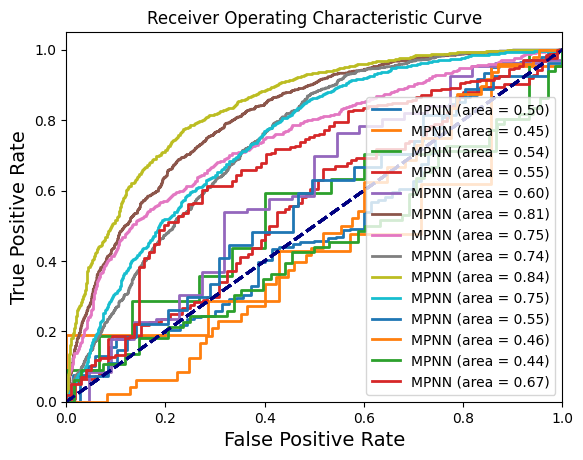

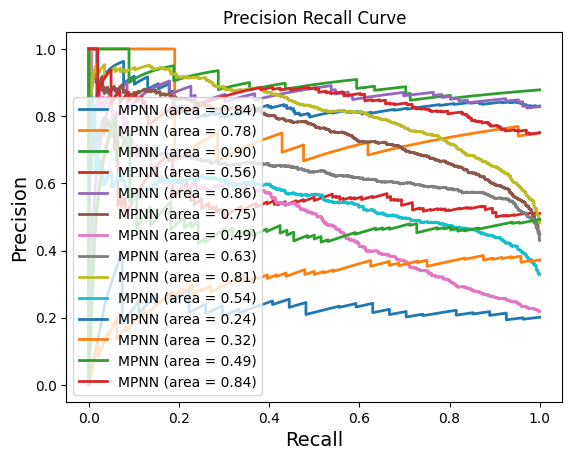

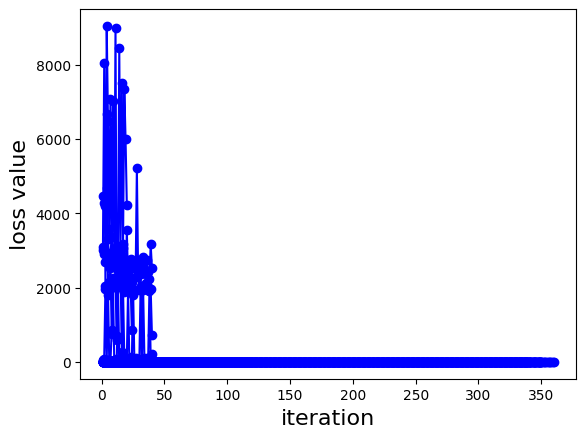

In [81]:
from tdc.utils import retrieve_dataset_names
adme_datasets = retrieve_dataset_names('ADME')
#adme_datasets.remove('solubility_aqsoldb')
#adme_datasets.remove('ppbr_az')

predictions = {}
for dataset_name in adme_datasets:
    print(dataset_name)
    X, y = ADME(name = dataset_name).get_data(format = 'DeepPurpose')
    drug_encoding = 'MPNN'
    train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')
    config = utils.generate_config(drug_encoding = drug_encoding,
                                  train_epoch = 10,
                                  LR = 0.001,
                                  batch_size = 256,
                                  mpnn_hidden_size= 50,
                                  mpnn_depth = 3)
    model = CompoundPred.model_initialize(**config)
    model.train(train, val, test)
    y_pred = model.predict(test)
    predictions[dataset_name] = y_pred

In [87]:
results = group.evaluate(predictions)

['caco2_wang', 'hia_hou', 'pgp_broccatelli', 'bioavailability_ma', 'lipophilicity_astrazeneca', 'solubility_aqsoldb', 'bbb_martins', 'ppbr_az', 'vdss_lombardo', 'cyp2d6_veith', 'cyp3a4_veith', 'cyp2c9_veith', 'cyp2d6_substrate_carbonmangels', 'cyp3a4_substrate_carbonmangels', 'cyp2c9_substrate_carbonmangels', 'half_life_obach', 'clearance_microsome_az', 'clearance_hepatocyte_az', 'herg', 'ames', 'dili', 'ld50_zhu']


ValueError: ('hydrationfreeenergy_freesolv', 'does not match to available values. Please double check.')

In [ ]:

#MACCS is a popular fingerprint used as descriptors for ML tasks (according to literature)
#Also chosen for this task because the size of the descriptor is relatively small and the dataset is quite small
#Curse of dimensionality
maccskeys = deepchem.feat.MACCSKeysFingerprint()
maccs_train_abs = maccskeys.featurize(split_abs['train'].Drug.values)
maccs_valid_abs = maccskeys.featurize(split_abs['valid'].Drug.values)
maccs_test_abs = maccskeys.featurize(split_abs['test'].Drug.values)

xgboost.XGBRegressor()
xgb = xgboost.XGBRegressor(tree_method='exact')
xgb.fit(maccs_train_abs, split_abs['train'].Y.values)

pred_xgb = xgb.predict(maccs_test_abs)
score = evaluator(split['test'].Y.values, pred_xgb)
scores['XGBoost'] = score

In [ ]:
#PubChem fingerprint took was taking too long to 
pubchem = deepchem.feat.PubChemFingerprint()
pubchem_train_abs = pubchem.featurize(split_abs['train'].Drug.values)

In [ ]:
# Potentially in the future/had more time could have done a small hyperparameter optimsation on all the models
# finetune with grid search
xgb = xgboost.XGBRegressor(tree_method='exact')

params = {
    "n_estimators": [50, 100, 200, 500, 1000],
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 1, 5, 10],
    "reg_lambda": [0, 0.1, 1, 5, 10],
    "min_child_weight": [1, 3, 5]
}

clf = RandomizedSearchCV(
    estimator=xgb, param_distributions=params,
    scoring='neg_mean_absolute_error', n_iter=100
)
clf.fit(maccs_train_abs, split_abs['train'].Y.values)

# print best parameters
best_params = clf.best_params_
print(best_params)

predictions_list = []
feature_imp_list = []


xgb = xgboost.XGBRegressor(
    tree_method='exact',
    **best_params
)
xgb.fit(maccs_train_abs, split_abs['train'].Y.values)
pred_xgb = xgb.predict(maccs_test_abs)
print(evaluator(split['test'].Y.values, pred_xgb))